The image has 62500 pixels
I count 9 coins in this image.
1 inch = 2.54cm
dpi of this image = 72 px/in
therefore 1px = 2.54/72 = 0.03528 cm
Coin #1 has a diameter equal to 56.00 pixels or 1.97 cm.
Coin #2 has a diameter equal to 48.00 pixels or 1.68 cm.
Coin #3 has a diameter equal to 55.00 pixels or 1.94 cm.
Coin #4 has a diameter equal to 43.00 pixels or 1.51 cm.
Coin #5 has a diameter equal to 48.00 pixels or 1.68 cm.
Coin #6 has a diameter equal to 43.00 pixels or 1.52 cm.
Coin #7 has a diameter equal to 42.00 pixels or 1.48 cm.
Coin #8 has a diameter equal to 40.00 pixels or 1.42 cm.
Coin #9 has a diameter equal to 53.00 pixels or 1.89 cm.


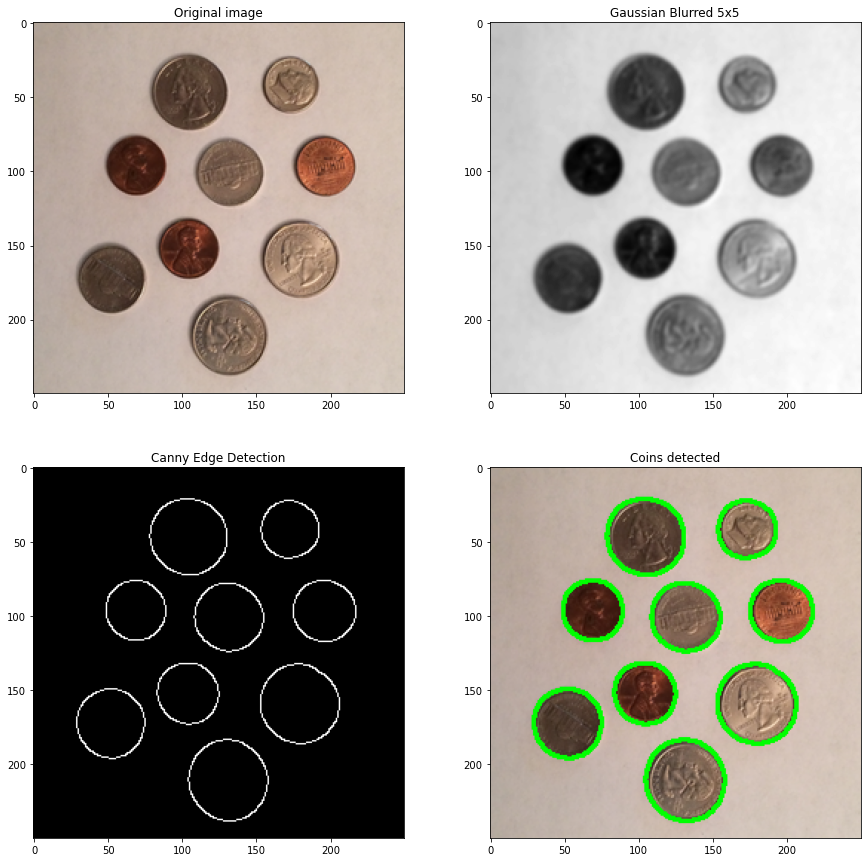

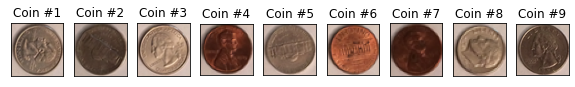

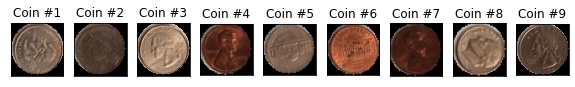

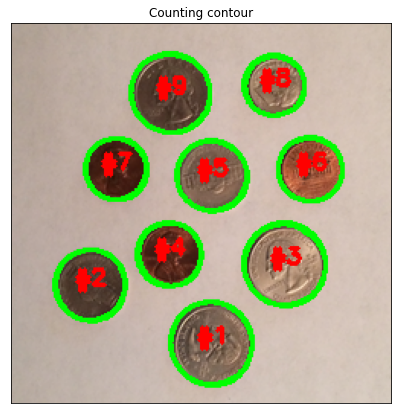

In [3]:
import cv2
import numpy as np
from imutils import convenience
from matplotlib import pyplot as plt

#Load image and convert to gray scale
path = r'../images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Blur with Gaussian blur 5x5
blurred = cv2.GaussianBlur(gray, (5,5), 1.3)

#Canny edge detection with suggest parameter
v = np.median(blurred)
sigma = 0.33
lower = int((1.0 - sigma)*v)
upper = int((1.0 + sigma)*v)
canny = cv2.Canny(blurred, lower, upper)

#Find and draw contour on edged image
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("The image has {} pixels".format(gray.size))
print("I count {} coins in this image.".format(len(cnts)))
print('1 inch = 2.54cm')
print('dpi of this image = 72 px/in')
print('therefore 1px = 2.54/72 = 0.03528 cm')
coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255,  0), 2)

#Plot the results
fig = plt.figure(figsize=(15, 15)) #create figure
fig.tight_layout(pad=3)
#Ax1
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Original image")
ax1.imshow(image, cmap='gray')
#Ax2
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Gaussian Blurred 5x5")
ax2.imshow(blurred, cmap='gray')
#Ax3
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Canny Edge Detection")
ax3.imshow(canny, cmap='gray')
#Ax4
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Coins detected")
ax4.imshow(coins)

#Cut the coin from the image
fig2, ax = plt.subplots(1, 9, figsize=(10, 7))
fig3, bx = plt.subplots(1, 9, figsize=(10, 7))
fig4, cx = plt.subplots(figsize=(7, 7))

# Now, let's loop over each contour
for (i, c) in enumerate(cnts):
    #Draw number of contour on coins
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(coins, (int(cX), int(cY)), int(radius), (0, 255, 0), 2)
    cv2.putText(coins, "#{}".format(i+1), (int(cX) - 10, int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    # We can compute the 'bounding box' for each contour, which is the rectangle that encloses the contour
    (x, y, w, h) = cv2.boundingRect(c)
    coin = image[y:y+h, x:x+w] # Now that we have the contour, let's extract it using array slices
    ax[i].set(title='Coin #{}'.format(i+1))
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].imshow(coin)
    #Cut the coin into circle
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    cv2.circle(mask, (int(cX), int(cY)), int(radius), 255, -1)
    mask = mask[y:y+h,x:x+w]
    mcoin = cv2.bitwise_and(coin, coin, mask=mask)
    #formatted_float = "{:.2f}".format(a_float)
    print('Coin #{} has a diameter equal to {:.2f} pixels or {:.2f} cm.'.format(i+1, round(radius*2), radius*2*0.03528))
    bx[i].set(title='Coin #{}'.format(i+1))
    bx[i].axes.xaxis.set_visible(False)
    bx[i].axes.yaxis.set_visible(False)
    bx[i].imshow(mcoin)

cx.set(title='Counting contour')
cx.axes.xaxis.set_visible(False)
cx.axes.yaxis.set_visible(False)
cx.imshow(coins)


`cv2.drawContours(image, contour, index of contour (-1 means all), RGB color code(0, 255,  0), thickness of contour line)`